# Preprocessing

In [1]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format
import seaborn as sns
%matplotlib inline

In [2]:
# import data
file_name = '../../Data/Wage.csv'
Wage = pd.read_csv(file_name, index_col='SlNo')

In [3]:
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
SlNo,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.31806333496276,75.0431540173515
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527250510331,70.4760196469445
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.8750612633917,130.982177377461
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04139268515823,154.68529299563
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.31806333496276,75.0431540173515


In [4]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


In [5]:
Wage.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year,"3,000.0","2,005.79",2.03,"2,003.0","2,004.0","2,006.0","2,008.0","2,009.0"
age,"3,000.0",42.41,11.54,18.0,33.75,42.0,51.0,80.0
logwage,"3,000.0",4.65,0.35,3.0,4.45,4.65,4.86,5.76
wage,"3,000.0",111.7,41.73,20.09,85.38,104.92,128.68,318.34


### Exploring relationships with other features in the Wage data set

### 'maritl' and 'jobclass'

*Basic exploration of the dataset*

In [6]:
Wage.maritl.value_counts(sort=True)

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [7]:
Wage.jobclass.value_counts(sort=True)

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/ds4b_101p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ds4b_101p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'wage as function of jobclass')

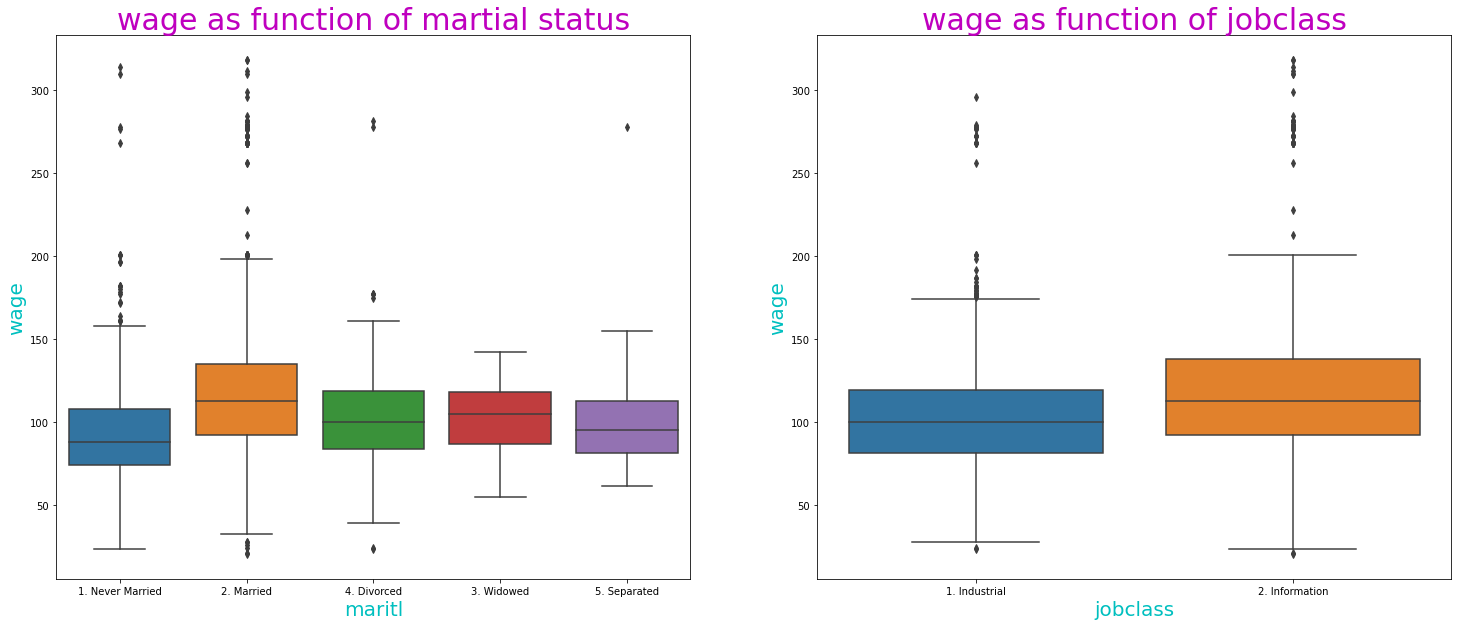

In [8]:
# plt.xkcd()
fig, axes = plt.subplots(1, 2, figsize=(25,10))

sns.boxplot(Wage.maritl, Wage.wage, ax=axes[0])
axes[0].set_xlabel('maritl', fontsize=20, color='c')
axes[0].set_ylabel('wage', fontsize=20, color='c')
axes[0].set_title('wage as function of martial status', color='m', fontsize=30)


sns.boxplot(Wage.jobclass, Wage.wage, ax=axes[1])
axes[1].set_xlabel('jobclass', fontsize=20, color='c')
axes[1].set_ylabel('wage', fontsize=20, color='c')
axes[1].set_title('wage as function of jobclass', color='m', fontsize=30)

**Initial plots show married people and those in the the information sector make more money than their counterparts.**

**Polynomial regression**

*I cannot increase degrees of categorical variables like 'maritl' and 'jobclass'. Therefore, it will reduce to normal linear regression.*

In [9]:
X1 = Wage.maritl.astype('category').cat.codes
X2 = Wage.jobclass.astype('category').cat.codes
y = Wage.wage
df = pd.concat([y, X1, X2], axis=1)
df.columns = ['wage', 'maritl', 'jobclass']
df.head()

,wage,maritl,jobclass
SlNo,,,
231655,75.0431540173515,0,0
86582,70.4760196469445,0,1
161300,130.982177377461,1,0
155159,154.68529299563,1,1
11443,75.0431540173515,3,1


In [10]:
lm1 = ols('df.wage ~ df.maritl', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.66
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           0.000222
Time:                        20:59:21   Log-Likelihood:                -15443.
No. Observations:                3000   AIC:                         3.089e+04
Df Residuals:                    2998   BIC:                         3.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.3063      1.193     90.805      0.000     105.968     110.645
df.maritl      3.4620      0.937      3.697      0.000       1.626       5.298
==============================================================================
Omnibus:                     1063.089   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4418.764
Skew:                           1.695   Prob(JB):                         0.00
Kurtosis:                       7.885   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm2 = ols('df.wage ~ df.jobclass', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.31e-30
Time:                        21:00:02   Log-Likelihood:                -15384.
No. Observations:                3000   AIC:                         3.077e+04
Df Residuals:                    2998   BIC:                         3.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     103.3211      1.039     99.428      0.000     101.284     105.359
df.jobclass    17.2716      1.492     11.579      0.000      14.347      20.196
==============================================================================
Omnibus:                     1014.070   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.791
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                       7.662   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm3 = ols('df.wage ~ df.maritl+df.jobclass', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     73.31
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           8.26e-32
Time:                        21:00:12   Log-Likelihood:                -15378.
No. Observations:                3000   AIC:                         3.076e+04
Df Residuals:                    2997   BIC:                         3.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     100.2638      1.361     73.683      0.000      97.596     102.932
df.maritl       3.1831      0.917      3.471      0.001       1.385       4.981
df.jobclass    17.1349      1.489     11.504      0.000      14.215      20.055
==============================================================================
Omnibus:                     1022.589   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4117.593
Skew:                           1.635   Prob(JB):                         0.00
Kurtosis:                       7.716   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
MSE_df = pd.concat([pd.DataFrame([lm1.mse_model]), pd.DataFrame([lm2.mse_model]), pd.DataFrame([lm3.mse_model])], axis=1)
MSE_df.columns = ['lm1', 'lm2', 'lm3']
MSE_df = MSE_df.T
MSE_df.columns = ['Model MSE']
MSE_df

,Model MSE
lm1,"23,694.336191013455"
lm2,"223,538.41333900858"
lm3,"121,777.4068640992"


**The model with marital status as the sole regressor provides the least MSE.**

**Splines**

*Splines cannot be fit on categorical variables.*

**GAM**

In [14]:
from patsy import dmatrix

In [15]:
X3 = Wage.age
X3_age = dmatrix("cr(AGE, df=4)", {"AGE": Wage['age']}, return_type='dataframe')
df = pd.concat([df, X3_age], axis=1)
df.head()

,wage,maritl,jobclass,Intercept,"cr(AGE, df=4)[0]","cr(AGE, df=4)[1]","cr(AGE, df=4)[2]","cr(AGE, df=4)[3]"
SlNo,,,,,,,,
231655,75.0431540173515,0,0,1.0,1.0,0.0,0.0,0.0
86582,70.4760196469445,0,1,1.0,0.6274303797468355,0.4624177215189873,-0.10555581127733023,0.015707710011507486
161300,130.982177377461,1,0,1.0,-0.08034493670886078,0.7566946202531647,0.372736910241657,-0.049086593785960905
155159,154.68529299563,1,1,1.0,-0.07238924050632911,0.8562104430379748,0.2512406501726122,-0.035061852704257795
11443,75.0431540173515,3,1,1.0,-0.06501265822784816,0.45407594936708884,0.6799815880322209,-0.06904487917146152


In [16]:
lm_gam = ols('df.wage ~ df.maritl + df.jobclass + X3_age', data=df).fit()
lm_gam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     66.63
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.14e-78
Time:                        21:02:27   Log-Likelihood:                -15262.
No. Observations:                3000   AIC:                         3.054e+04
Df Residuals:                    2993   BIC:                         3.058e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.234e+13   5.46e+13      0.409      0.682   -8.47e+13    1.29e+14
df.maritl      -1.8693      0.948     -1.972      0.049      -3.728      -0.011
df.jobclass    15.1216      1.441     10.492      0.000      12.296      17.948
X3_age[0]   -2.854e+13   6.97e+13     -0.409      0.682   -1.65e+14    1.08e+14
X3_age[1]    6.201e+12   1.52e+13      0.409      0.682   -2.35e+13    3.59e+13
X3_age[2]    6.201e+12   1.52e+13      0.409      0.682   -2.35e+13    3.59e+13
X3_age[3]    6.201e+12   1.52e+13      0.409      0.682   -2.35e+13    3.59e+13
X3_age[4]    6.201e+12   1.52e+13      0.409      0.682   -2.35e+13    3.59e+13
==============================================================================
Omnibus:                     1049.927   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4579.846
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                       8.073   Cond. No.                     2.95e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
lmgam_mse = lm_gam.mse_model

In [18]:
MSE_df = pd.concat([pd.DataFrame([lm1.mse_model]), pd.DataFrame([lm2.mse_model]), pd.DataFrame([lm3.mse_model]), pd.DataFrame([lmgam_mse])], axis=1)
MSE_df.columns = ["regression(maritl)", "regression(jobclass)", "regression(maritl+jobclass)", 'GAM']
MSE_df = MSE_df.T
MSE_df.columns = ['model_MSE']
MSE_df

,model_MSE
regression(maritl),"23,694.336191013455"
regression(jobclass),"223,538.41333900858"
regression(maritl+jobclass),"121,777.4068640992"
GAM,"102,558.47557758586"


Text(0.5, 1.0, 'model MSE for different models')

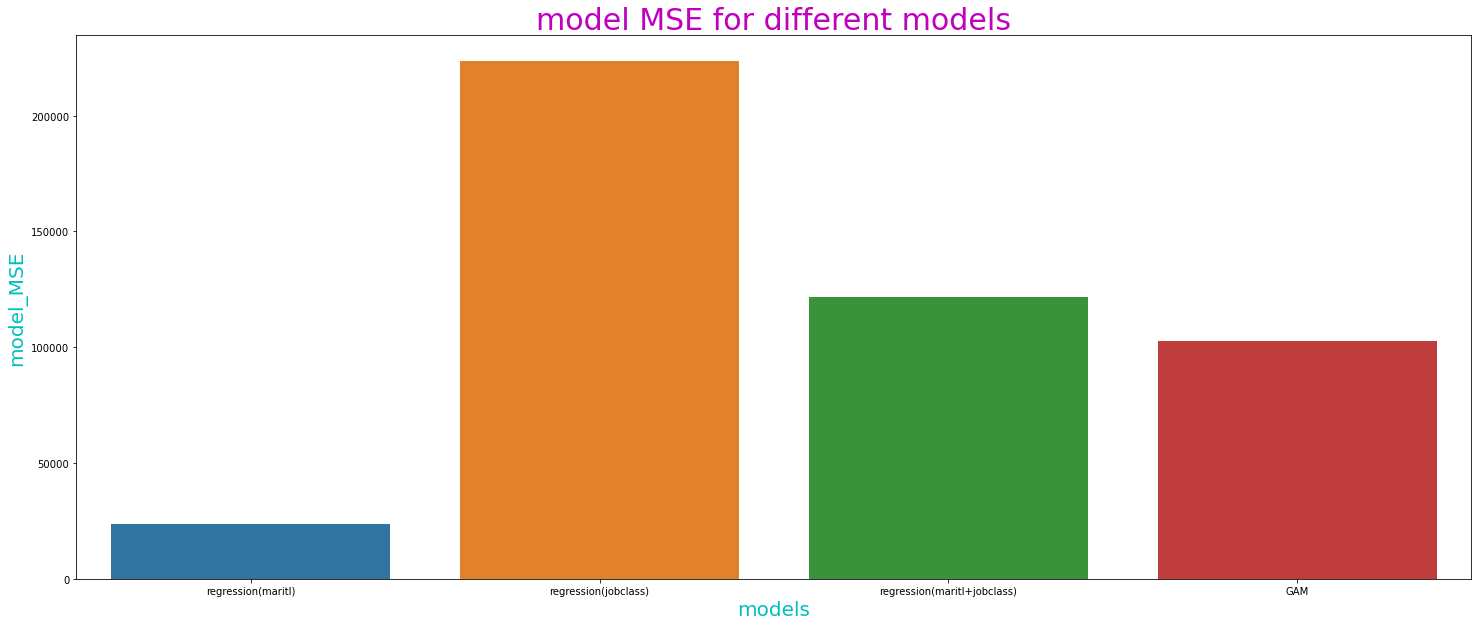

In [19]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
sns.barplot(x=MSE_df.index, y=MSE_df.model_MSE, data=MSE_df)
plt.xlabel('models', fontsize=20, color='c')
plt.ylabel('model_MSE', fontsize=20, color='c')
plt.title('model MSE for different models', fontsize=30, color='m')